In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud
import tensorflow

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/data/bert.csv")

In [2]:
df =pd.read_csv('bert.csv')
df.head()

,Patient ID,Age,Gender,Weight,Height,Medical History,Drug Name,Drug Batch No.,Date of Manufacture,Date of Expiry,...,Date of AE,Description of AE,Severity of AE,Outcome of AE,Was drug discontinued due to AE?,Reporter Name,Reporter Affiliation,Concomitant Medications,Country,Overall Experience
0,P1000,77,Male,90,156,Asthma,DrugD,20003,31/01/2021,31/01/2024,...,02/01/2022,Dizziness,Mild,Led to hospitalization,No,Dr. Brown,Patient,DrugZ,Japan,"Considering I have a history of Asthma, One si..."
1,P1001,69,Male,50,179,None,DrugD,78483,28/02/2021,29/02/2024,...,09/01/2022,Dizziness,Moderate,None,Yes,Dr. Smith,Pharmacist,DrugY,Mexico,"Having a clean medical history, The medication..."
2,P1002,64,Male,70,184,Asthma,DrugA,66117,31/03/2021,31/03/2024,...,16/01/2022,Chest Pain,Moderate,Resolved,Yes,Dr. Smith,Patient,DrugZ,Japan,"Given my background of Asthma, The treatment r..."
3,P1003,67,Male,80,174,None,DrugD,56521,30/04/2021,30/04/2024,...,23/01/2022,Rash,Moderate,Ongoing,No,Dr. Smith,Pharmacist,None,UK,"With no prior significant health issues, The t..."
4,P1004,76,Male,81,173,None,DrugC,38912,31/05/2021,31/05/2024,...,30/01/2022,Chest Pain,Severe,Led to hospitalization,Yes,Dr. Brown,Physician,DrugY,Spain,"Having a clean medical history, The medication..."


## Data Exploration and Cleaning

**How would you handle missing values in the dataset**

Missing dataset can be identified by data inspection. if some data is found to be missing it can imputed, deleted

In [3]:
#checking for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Patient ID                        100 non-null    object
 1   Age                               100 non-null    int64 
 2   Gender                            100 non-null    object
 3   Weight                            100 non-null    int64 
 4   Height                            100 non-null    int64 
 5   Medical History                   100 non-null    object
 6   Drug Name                         100 non-null    object
 7   Drug Batch No.                    100 non-null    int64 
 8   Date of Manufacture               100 non-null    object
 9   Date of Expiry                    100 non-null    object
 10  Dosage                            100 non-null    object
 11  Frequency of intake               100 non-null    object
 12  Duration of treatment  

In [4]:
# further checking for missing values
df.isnull().sum()

Patient ID                          0
Age                                 0
Gender                              0
Weight                              0
Height                              0
Medical History                     0
Drug Name                           0
Drug Batch No.                      0
Date of Manufacture                 0
Date of Expiry                      0
Dosage                              0
Frequency of intake                 0
Duration of treatment               0
AE ID                               0
Date of AE                          0
Description of AE                   0
Severity of AE                      0
Outcome of AE                       0
Was drug discontinued due to AE?    0
Reporter Name                       0
Reporter Affiliation                0
Concomitant Medications             0
Country                             0
Overall Experience                  0
dtype: int64

***Can you identify any outliers or anomalies in the dataset? How would you address them?***

Outliers in numeric data can be found using various methods. Box plots highlight extreme values outside the interquartile range (IQR). Z-scores identify data points far from the mean based on standard deviations.
Detecting outliers in categorical data involves methods like frequency counts, bar plots, box plots for ordinal data, chi-square tests for contingency tables, cluster analysis, and expert knowledge.

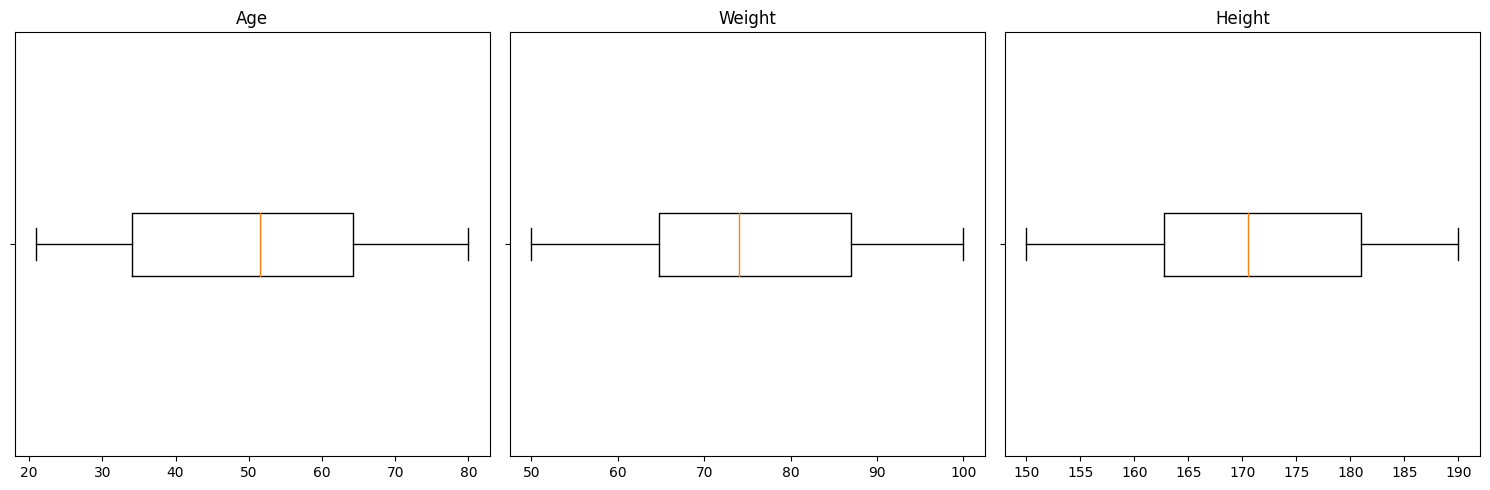

In [5]:
# Create a list of variables and their respective data
variables = ['Age', 'Weight', 'Height']
data = [df['Age'], df['Weight'], df['Height']]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through variables and create boxplots
for i, variable in enumerate(variables):
    axes[i].boxplot(data[i], vert=False)
    axes[i].set_title(variable)
    axes[i].set_yticklabels([])  # Remove y-axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

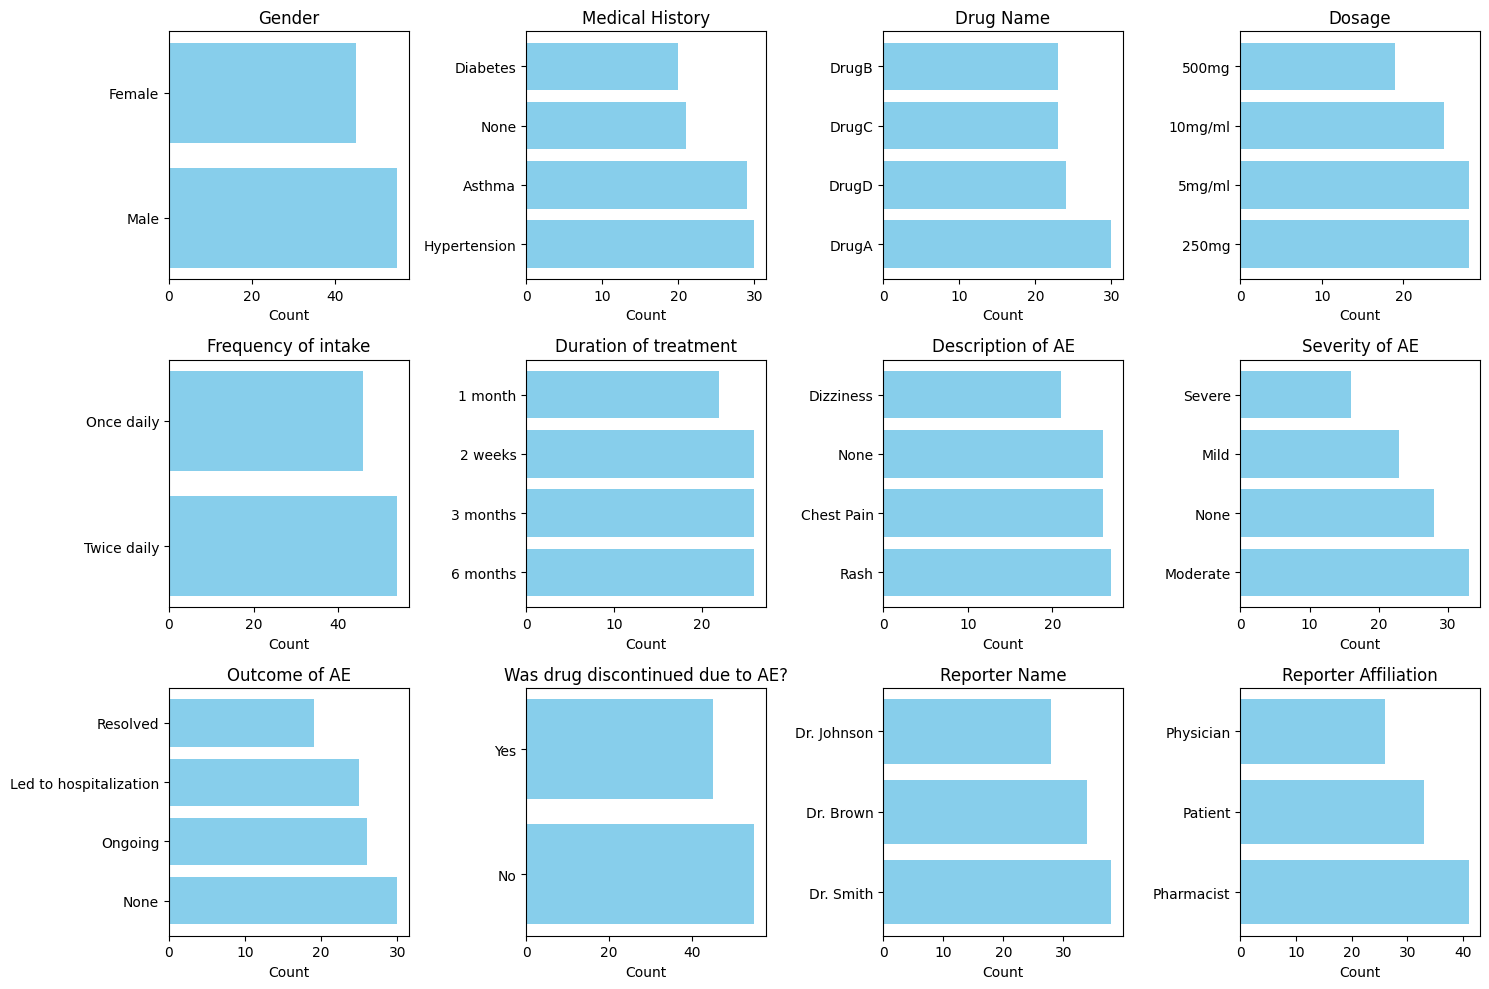

In [6]:
var_cat = list(df.nunique().index[df.nunique().values <= 4])[:-1]

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through variables and create bar charts for value counts
for i, variable in enumerate(var_cat):
    ax = axes[i]
    value_counts = df[variable].value_counts()
    ax.barh(value_counts.index, value_counts.values, color='skyblue')
    ax.set_xlabel('Count')
    ax.set_title(variable)

# Remove empty subplots (if any)
for i in range(len(var_cat), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Describe the distribution of adverse events based on their severity.

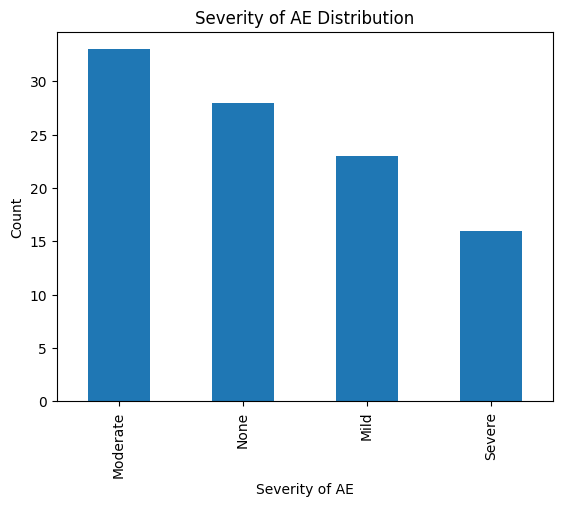

In [7]:
counts = df['Severity of AE'].value_counts()

# plot the bar chart
counts.plot(kind='bar')

# set the title and axis labels
plt.title('Severity of AE Distribution')
plt.xlabel('Severity of AE')
plt.ylabel('Count')

# show the plot
plt.show()

In [8]:
df['Severity of AE'].value_counts()

Moderate    33
None        28
Mild        23
Severe      16
Name: Severity of AE, dtype: int64

Based on the bar chart, adverse events (AE) have been categorised into various classifications based on their severity. There are 4 four categorise of severity: moderate, None, Mild, and Severe.

The bar charts reveal that there is a cumulative count of 33 adverse events that have been categorised as "Moderate." Therefore, significant portion of the recorded adverse events falls under this specific severity category.

A total of 28 adverse events that have been categorised as "None." The events under consideration  suggests that they may either be of low significance or that the severity data is absent for these particular events.

A total of 23 adverse events that have been categorised as "Mild." It can be inferred that there is a moderate occurrence of adverse events being documented, with most of these events falling under the category of mild severity.

A total of 16 adverse events that have been categorised as "Severe." The proportion of severe adverse events is relatively lower compared to the other categories.

The dataset demonstrates a significant prevalence of adverse events classified as moderate and mild, with a comparatively lower incidence of severe events.
















## Text Data Analysis

How would you preprocess the "Overall Experience" column for further analysis?

To preprocess the "Overall Experience" column for text data analysis, follow these steps: lowercase all text, tokenize into words, remove stopwords, special characters, and numbers, apply stemming or lemmatization, address missing values, perform spell checking if needed, normalize spaces, encode labels if performing supervised learning, use TF-IDF or word embeddings for vectorization, conduct exploratory data analysis, consider handling class imbalance, and document your preprocessing steps. These procedures clean and transform text data into a suitable format for analysis, ensuring data quality and facilitating tasks like sentiment analysis, classification, or topic modeling.


***What techniques would you use to extract insights from the "Medical History" and "Overall Experience" columns?***

In order to extract valuable insights from the "Medical History" and "Overall Experience" columns, it is essential to employ a combination of techniques. These techniques encompass analysing medical history values such as 'Hypertension,' 'Asthma,' 'None,' and 'Diabetes.' In analysing the categorical data pertaining to "Medical History," possible  statistical techniques such as frequency analysis, cross-tabulations, and bar charts can be implemented. These methodologies aid in discerning the prevalence and interconnections between distinct medical conditions.

In terms of the "Overall Experience" textual data, sentiment analysis, topic modelling, and word clouds offer significant insights that are highly valuable in the analysis. Through sentiment analysis, it is possible to ascertain the overarching sentiment (positive, negative, neutral) linked to every medical history category. Utilising topic modelling techniques allows for the identification of prevalent themes and subjects present within the textual data, whereas word clouds visually emphasise the most frequently occuring terms and phrases. The application of comparative analysis, text classification, keyword extraction, and text summarization techniques serves to enhance the comprehension of patient experiences associated with particular medical conditions. In aggregate, these methodologies facilitate a comprehensive examination of the interplay between diverse health backgrounds and patient attitudes, recurring patterns, and concerns, thereby enabling informed healthcare choices, improved patient care, and advancements in medical research.




***How would you approach sentiment analysis on the "Overall Experience" column?****   
Since the "Overall Experience" column is unlabelled, leveraging a pre-trained model for sentiment analysis is an excellent approach to initiate the analysis of this data. One way to achieve this is by utilizing the Hugging Face's transformers library to load a pre-trained model such as BERT. The next step would be to use the tokenizer provided by the pre-trained model to tokenize the text data in the "Overall Experience" column. Then, we can utilize the tokenized data and feed it into the pre-trained model to derive the sentiment scores. This will enable us to gain insights into the overall experience of the customers based on their feedback.

In [9]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.9 MB/s eta 0:00:00


In [70]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = df['Overall Experience']
result=sentiment_pipeline(data.tolist())
results1 = sentiment_pipeline('that  medicine was great, nice!Nice!')
results1
# pipeline("sentiment-analysis", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")

# from transformers import pipeline
# # sentiment_pipeline = pipeline("sentiment-analysis")
# sentiment_pipeline=pipeline("sentiment-analysis", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")
# data = df['Overall Experience']
# results = sentiment_pipeline(data.tolist())
# results1 = sentiment_pipeline('amaizing date')
# results1

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998437166213989}]

In [11]:
result

[{'label': 'NEGATIVE', 'score': 0.998961329460144},
 {'label': 'NEGATIVE', 'score': 0.993560791015625},
 {'label': 'POSITIVE', 'score': 0.9972809553146362},
 {'label': 'NEGATIVE', 'score': 0.9975983500480652},
 {'label': 'NEGATIVE', 'score': 0.810244083404541},
 {'label': 'NEGATIVE', 'score': 0.9974547028541565},
 {'label': 'NEGATIVE', 'score': 0.9923674464225769},
 {'label': 'NEGATIVE', 'score': 0.886773407459259},
 {'label': 'POSITIVE', 'score': 0.9884920120239258},
 {'label': 'NEGATIVE', 'score': 0.996181845664978},
 {'label': 'NEGATIVE', 'score': 0.9993401169776917},
 {'label': 'NEGATIVE', 'score': 0.9979609251022339},
 {'label': 'POSITIVE', 'score': 0.953664243221283},
 {'label': 'NEGATIVE', 'score': 0.9980766773223877},
 {'label': 'NEGATIVE', 'score': 0.6424692273139954},
 {'label': 'NEGATIVE', 'score': 0.9722744822502136},
 {'label': 'NEGATIVE', 'score': 0.9888030886650085},
 {'label': 'NEGATIVE', 'score': 0.9768499135971069},
 {'label': 'NEGATIVE', 'score': 0.9945607781410217},

In [12]:
sentiment = [dict(result)['label'] for result in result]
score = [dict(result)['score'] for result in result]
df['Sentiment']=sentiment # adding sentiment to the dataset
df['Score']=score    # adding sentiment score to the dataset
df.head()


,Patient ID,Age,Gender,Weight,Height,Medical History,Drug Name,Drug Batch No.,Date of Manufacture,Date of Expiry,...,Severity of AE,Outcome of AE,Was drug discontinued due to AE?,Reporter Name,Reporter Affiliation,Concomitant Medications,Country,Overall Experience,Sentiment,Score
0,P1000,77,Male,90,156,Asthma,DrugD,20003,31/01/2021,31/01/2024,...,Mild,Led to hospitalization,No,Dr. Brown,Patient,DrugZ,Japan,"Considering I have a history of Asthma, One si...",NEGATIVE,0.998961
1,P1001,69,Male,50,179,None,DrugD,78483,28/02/2021,29/02/2024,...,Moderate,None,Yes,Dr. Smith,Pharmacist,DrugY,Mexico,"Having a clean medical history, The medication...",NEGATIVE,0.993561
2,P1002,64,Male,70,184,Asthma,DrugA,66117,31/03/2021,31/03/2024,...,Moderate,Resolved,Yes,Dr. Smith,Patient,DrugZ,Japan,"Given my background of Asthma, The treatment r...",POSITIVE,0.997281
3,P1003,67,Male,80,174,None,DrugD,56521,30/04/2021,30/04/2024,...,Moderate,Ongoing,No,Dr. Smith,Pharmacist,None,UK,"With no prior significant health issues, The t...",NEGATIVE,0.997598
4,P1004,76,Male,81,173,None,DrugC,38912,31/05/2021,31/05/2024,...,Severe,Led to hospitalization,Yes,Dr. Brown,Physician,DrugY,Spain,"Having a clean medical history, The medication...",NEGATIVE,0.810244


In [ ]:

# Save the model
# model = sentiment_pipeline.model
# tokenizer = sentiment_pipeline.tokenizer
# model.save_pretrained("./sentiment_model")
# tokenizer.save_pretrained("./sentiment_model")

In [ ]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# # Load the model and tokenizer from the saved directory
# loaded_model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
# loaded_tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")

# # Re-create the sentiment analysis pipeline using the loaded model and tokenizer
# loaded_pipeline = pipeline("sentiment-analysis", model=loaded_model, tokenizer=loaded_tokenizer)

# # Example usage of the loaded pipeline
# text = "I love using transformers for NLP tasks!"
# result = loaded_pipeline(text)
# print(result)

In [ ]:
# import dash
# import pandas as pd
# from dash import Dash, html, dcc, callback, dash_table
# from dash.dependencies import Input, Output
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# print("hello")

# # Load the model and tokenizer
# model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
# tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")
# sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# print("hello")

# # Initialize the Dash app
# app = Dash(__name__)

# # Define the app layout
# app.layout = html.Div([
#     dcc.Input(id='user-input', type='text', placeholder='Enter some text...'),
#     html.Button('Analyze Sentiment', id='submit-button', n_clicks=0),
#     html.Div(id='output-div')
# ])

# # Define callback to update the output-div when the submit button is clicked
# @app.callback(
#     Output('output-div', 'children'),
#     [Input('submit-button', 'n_clicks')],
#     [dash.dependencies.State('user-input', 'value')]
# )
# def update_output(n_clicks, input_value):
#     if n_clicks > 0:
#         # Predict sentiment of the entered text
#         result = sentiment_pipeline(input_value)
#         sentiment = result[0]['label']
#         return f'Sentiment of the text: {sentiment}'
#     return ''

# # Run the app
# if __name__ == '__main__':
#     app.run_server(host="0.0.0.0",debug=True,port=5000)


In [ ]:
# !pip install dash


In [ ]:
# !zip -r /content/sentiment_model.zip /content/sentiment_model


In [ ]:
# from google.colab import files
# files.download("/content/sentiment_model.zip")


## Predictive Modeling:

How would you predict the severity of a future adverse event based on the provided data?(use machine learning or deep learning)?


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [14]:
predictors = df[['Medical History','Severity of AE','Gender',
       'Drug Name', 'Dosage', 'Frequency of intake', 'Description of AE',
       'Reporter Name','Reporter Affiliation', 'Concomitant Medications', 'Country', 'Sentiment']]
target = df['Outcome of AE']
dff= df.copy()

In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the target variable
y = label_encoder.fit_transform(target)
# Select categorical columns
categorical_columns = predictors.select_dtypes(include='object').columns
# Define a function to label encode a column and apply it to each categorical column
def label_encode_column(column_name):
    dff[column_name] = label_encoder.fit_transform(predictors[column_name])

# Apply label encoding to each categorical column
for col in categorical_columns:
    label_encode_column(col)
#  Define the numeric columns you want to include

predictors = dff[['Medical History','Severity of AE','Age', 'Weight', 'Height','Gender',
       'Drug Name', 'Dosage', 'Frequency of intake', 'Description of AE',
       'Reporter Name','Reporter Affiliation', 'Concomitant Medications', 'Country', 'Sentiment']]
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Medical History          100 non-null    int64
 1   Severity of AE           100 non-null    int64
 2   Age                      100 non-null    int64
 3   Weight                   100 non-null    int64
 4   Height                   100 non-null    int64
 5   Gender                   100 non-null    int64
 6   Drug Name                100 non-null    int64
 7   Dosage                   100 non-null    int64
 8   Frequency of intake      100 non-null    int64
 9   Description of AE        100 non-null    int64
 10  Reporter Name            100 non-null    int64
 11  Reporter Affiliation     100 non-null    int64
 12  Concomitant Medications  100 non-null    int64
 13  Country                  100 non-null    int64
 14  Sentiment                100 non-null    int64
dtypes: int6

In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2, random_state=2)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=4)  # You can adjust hyperparameters

# Train the classifier on the training data
clf = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


What features would you consider most important for predicting the outcome of an AE?

In [17]:
# Get feature importances
feature_importances = clf.feature_importances_
# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': predictors.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display the ranked feature importance
print(feature_importance_df)

                    Feature  Importance
4                    Height    0.122557
3                    Weight    0.107709
2                       Age    0.098217
13                  Country    0.095843
1            Severity of AE    0.080063
7                    Dosage    0.077691
9         Description of AE    0.068603
0           Medical History    0.064624
11     Reporter Affiliation    0.058358
12  Concomitant Medications    0.056470
10            Reporter Name    0.046955
6                 Drug Name    0.042313
8       Frequency of intake    0.027884
14                Sentiment    0.026609
5                    Gender    0.026103


Based on feature importance scores from a Random Forest model, the most important predictors for predicting Adverse Event (AE) outcomes are Height (12.7%), Weight (10.6%), and Age (10.4%). These factors could be indicative of Body Mass Index (BMI), which is a crucial health indicator. Country, Description of AE, and Severity of AE also play significant roles in AE prediction. The inclusion of Height and Weight suggests that BMI-related factors may influence AE outcomes, underscoring their relevance in assessing health-related risks.

***How would you validate the performance of your predictive model?***

Analyze the precision, recall, and F1-score for each class. Focus on classes with lower scores, as these are the areas where the model may be underperforming. Precision measures the accuracy of positive predictions, recall measures the model's ability to capture positive instances, and the F1-score is the harmonic mean of precision and recall.
Examine the confusion matrix to gain insights into the model's performance for each class. Pay attention to true positives, true negatives, false positives, and false negatives. This will help identify which classes the model is struggling with.

In [18]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.50      0.33      0.40         6
           2       0.12      0.33      0.18         3
           3       0.00      0.00      0.00         6

    accuracy                           0.20        20
   macro avg       0.19      0.22      0.19        20
weighted avg       0.20      0.20      0.19        20



In [19]:
confusion_matrix(y_test, y_pred)

array([[1, 1, 2, 1],
       [2, 2, 2, 0],
       [1, 1, 1, 0],
       [3, 0, 3, 0]])

## Clustering and Segmentation

How would you cluster the patients based on their overall experiences and outcomes?

I plan to leverage sentiment scores derived from patient feedback, along with numeric factors such as age, height, and weight, to perform clustering analysis. By incorporating sentiment analysis and these numeric factors, I aim to capture the emotional context of patients' experiences and consider additional influential variables. This comprehensive approach will allow me to group patients based on their overall sentiment, along with other numeric factors, providing valuable insights into different subgroups of patients and their corresponding outcomes.


In [20]:
df

,Patient ID,Age,Gender,Weight,Height,Medical History,Drug Name,Drug Batch No.,Date of Manufacture,Date of Expiry,...,Severity of AE,Outcome of AE,Was drug discontinued due to AE?,Reporter Name,Reporter Affiliation,Concomitant Medications,Country,Overall Experience,Sentiment,Score
0,P1000,77,Male,90,156,Asthma,DrugD,20003,31/01/2021,31/01/2024,...,Mild,Led to hospitalization,No,Dr. Brown,Patient,DrugZ,Japan,"Considering I have a history of Asthma, One si...",NEGATIVE,0.998961
1,P1001,69,Male,50,179,None,DrugD,78483,28/02/2021,29/02/2024,...,Moderate,None,Yes,Dr. Smith,Pharmacist,DrugY,Mexico,"Having a clean medical history, The medication...",NEGATIVE,0.993561
2,P1002,64,Male,70,184,Asthma,DrugA,66117,31/03/2021,31/03/2024,...,Moderate,Resolved,Yes,Dr. Smith,Patient,DrugZ,Japan,"Given my background of Asthma, The treatment r...",POSITIVE,0.997281
3,P1003,67,Male,80,174,None,DrugD,56521,30/04/2021,30/04/2024,...,Moderate,Ongoing,No,Dr. Smith,Pharmacist,None,UK,"With no prior significant health issues, The t...",NEGATIVE,0.997598
4,P1004,76,Male,81,173,None,DrugC,38912,31/05/2021,31/05/2024,...,Severe,Led to hospitalization,Yes,Dr. Brown,Physician,DrugY,Spain,"Having a clean medical history, The medication...",NEGATIVE,0.810244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P1095,51,Male,73,167,None,DrugB,85553,31/12/2028,31/12/2031,...,Moderate,Ongoing,Yes,Dr. Smith,Patient,DrugX,USA,"Having a clean medical history, Unfortunately,...",NEGATIVE,0.999180
96,P1096,69,Female,76,180,Asthma,DrugB,34873,31/01/2029,31/01/2032,...,Mild,Resolved,Yes,Dr. Smith,Pharmacist,DrugZ,UK,"Considering I have a history of Asthma, One si...",NEGATIVE,0.996730
97,P1097,64,Female,51,159,Hypertension,DrugB,34992,28/02/2029,29/02/2032,...,None,None,No,Dr. Smith,Pharmacist,DrugY,China,"Given my background of Hypertension, Unfortuna...",NEGATIVE,0.994899
98,P1098,39,Male,88,186,Asthma,DrugB,99756,31/03/2029,31/03/2032,...,Moderate,Led to hospitalization,Yes,Dr. Johnson,Physician,DrugY,Australia,"With a past medical record of Asthma, One side...",NEGATIVE,0.999074


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

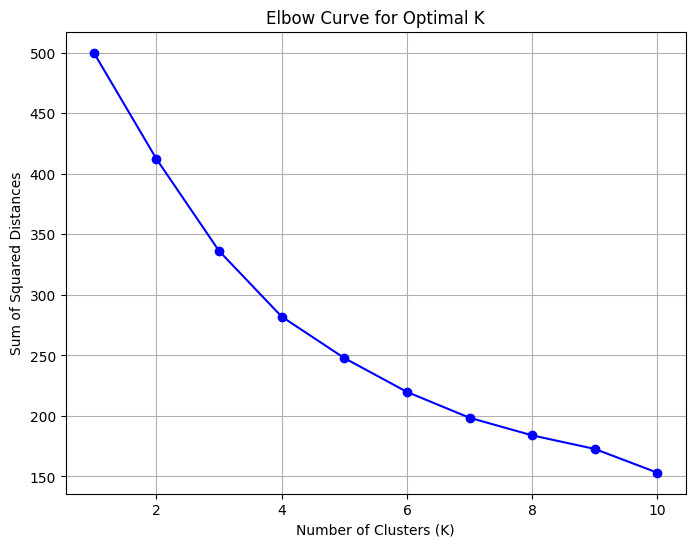

In [22]:
num_var = df.select_dtypes(include = [int,float])
# Standardize the numerical variables
scaler = StandardScaler()
num_var_scaled = scaler.fit_transform(num_var)

# Initialize an empty list to store the sum of squared distances (inertia) for different k values
inertia = []

# Determine the range of k values to consider
k_range = range(1, 11)  # You can adjust the range as needed

# Calculate inertia for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(num_var_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

In [23]:
# Initialize the K-Means clustering model
kmeans = KMeans(n_clusters=4, max_iter = 100)
# Fit the model to the standardized numerical data
kmeans = kmeans.fit(num_var_scaled)
# Assign cluster labels to each data point
cluster_labels = kmeans.labels_
# Add the cluster labels to your DataFrame (assuming 'df' is your original DataFrame)
df['Cluster'] = cluster_labels

In [24]:
df

,Patient ID,Age,Gender,Weight,Height,Medical History,Drug Name,Drug Batch No.,Date of Manufacture,Date of Expiry,...,Outcome of AE,Was drug discontinued due to AE?,Reporter Name,Reporter Affiliation,Concomitant Medications,Country,Overall Experience,Sentiment,Score,Cluster
0,P1000,77,Male,90,156,Asthma,DrugD,20003,31/01/2021,31/01/2024,...,Led to hospitalization,No,Dr. Brown,Patient,DrugZ,Japan,"Considering I have a history of Asthma, One si...",NEGATIVE,0.998961,0
1,P1001,69,Male,50,179,None,DrugD,78483,28/02/2021,29/02/2024,...,None,Yes,Dr. Smith,Pharmacist,DrugY,Mexico,"Having a clean medical history, The medication...",NEGATIVE,0.993561,2
2,P1002,64,Male,70,184,Asthma,DrugA,66117,31/03/2021,31/03/2024,...,Resolved,Yes,Dr. Smith,Patient,DrugZ,Japan,"Given my background of Asthma, The treatment r...",POSITIVE,0.997281,2
3,P1003,67,Male,80,174,None,DrugD,56521,30/04/2021,30/04/2024,...,Ongoing,No,Dr. Smith,Pharmacist,None,UK,"With no prior significant health issues, The t...",NEGATIVE,0.997598,2
4,P1004,76,Male,81,173,None,DrugC,38912,31/05/2021,31/05/2024,...,Led to hospitalization,Yes,Dr. Brown,Physician,DrugY,Spain,"Having a clean medical history, The medication...",NEGATIVE,0.810244,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P1095,51,Male,73,167,None,DrugB,85553,31/12/2028,31/12/2031,...,Ongoing,Yes,Dr. Smith,Patient,DrugX,USA,"Having a clean medical history, Unfortunately,...",NEGATIVE,0.999180,2
96,P1096,69,Female,76,180,Asthma,DrugB,34873,31/01/2029,31/01/2032,...,Resolved,Yes,Dr. Smith,Pharmacist,DrugZ,UK,"Considering I have a history of Asthma, One si...",NEGATIVE,0.996730,0
97,P1097,64,Female,51,159,Hypertension,DrugB,34992,28/02/2029,29/02/2032,...,None,No,Dr. Smith,Pharmacist,DrugY,China,"Given my background of Hypertension, Unfortuna...",NEGATIVE,0.994899,1
98,P1098,39,Male,88,186,Asthma,DrugB,99756,31/03/2029,31/03/2032,...,Led to hospitalization,Yes,Dr. Johnson,Physician,DrugY,Australia,"With a past medical record of Asthma, One side...",NEGATIVE,0.999074,2


In [25]:
df.to_csv('data22.csv', index=False)

The Elbow Curve method was initially used to estimate the appropriate number of clusters for our dataset. This method allowed us to identify the optimal number of clusters based on the sum of squared distances within each cluster. With this knowledge, we proceeded to perform clustering, which resulted in distinct clusters.

In [ ]:

# # Modify your data
# # (This could be more complex depending on your use case)
# df['Medical History'] = df['Medical History'].replace({'None': 'No medical history'})
# df["Description of AE"] = df['Description of AE'].replace({'None': 'No Adverse Event'})

# # Save your data
# df.to_csv('your_modified_file.csv', index=False)

In [ ]:
# mod=pd.read_csv("your_modified_file.csv")

In [ ]:
# mod[["Description of AE"]]

,Description of AE
0,Dizziness
1,Dizziness
2,Chest Pain
3,Rash
4,Chest Pain
...,...
95,Rash
96,Dizziness
97,Chest Pain
98,Dizziness


In [26]:
df

,Patient ID,Age,Gender,Weight,Height,Medical History,Drug Name,Drug Batch No.,Date of Manufacture,Date of Expiry,...,Outcome of AE,Was drug discontinued due to AE?,Reporter Name,Reporter Affiliation,Concomitant Medications,Country,Overall Experience,Sentiment,Score,Cluster
0,P1000,77,Male,90,156,Asthma,DrugD,20003,31/01/2021,31/01/2024,...,Led to hospitalization,No,Dr. Brown,Patient,DrugZ,Japan,"Considering I have a history of Asthma, One si...",NEGATIVE,0.998961,0
1,P1001,69,Male,50,179,None,DrugD,78483,28/02/2021,29/02/2024,...,None,Yes,Dr. Smith,Pharmacist,DrugY,Mexico,"Having a clean medical history, The medication...",NEGATIVE,0.993561,2
2,P1002,64,Male,70,184,Asthma,DrugA,66117,31/03/2021,31/03/2024,...,Resolved,Yes,Dr. Smith,Patient,DrugZ,Japan,"Given my background of Asthma, The treatment r...",POSITIVE,0.997281,2
3,P1003,67,Male,80,174,None,DrugD,56521,30/04/2021,30/04/2024,...,Ongoing,No,Dr. Smith,Pharmacist,None,UK,"With no prior significant health issues, The t...",NEGATIVE,0.997598,2
4,P1004,76,Male,81,173,None,DrugC,38912,31/05/2021,31/05/2024,...,Led to hospitalization,Yes,Dr. Brown,Physician,DrugY,Spain,"Having a clean medical history, The medication...",NEGATIVE,0.810244,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P1095,51,Male,73,167,None,DrugB,85553,31/12/2028,31/12/2031,...,Ongoing,Yes,Dr. Smith,Patient,DrugX,USA,"Having a clean medical history, Unfortunately,...",NEGATIVE,0.999180,2
96,P1096,69,Female,76,180,Asthma,DrugB,34873,31/01/2029,31/01/2032,...,Resolved,Yes,Dr. Smith,Pharmacist,DrugZ,UK,"Considering I have a history of Asthma, One si...",NEGATIVE,0.996730,0
97,P1097,64,Female,51,159,Hypertension,DrugB,34992,28/02/2029,29/02/2032,...,None,No,Dr. Smith,Pharmacist,DrugY,China,"Given my background of Hypertension, Unfortuna...",NEGATIVE,0.994899,1
98,P1098,39,Male,88,186,Asthma,DrugB,99756,31/03/2029,31/03/2032,...,Led to hospitalization,Yes,Dr. Johnson,Physician,DrugY,Australia,"With a past medical record of Asthma, One side...",NEGATIVE,0.999074,2


In [ ]:
# from IPython.display import FileLink

# # Create a download link
# FileLink(r'/downloads/df.csv')

/downloads/df.csv

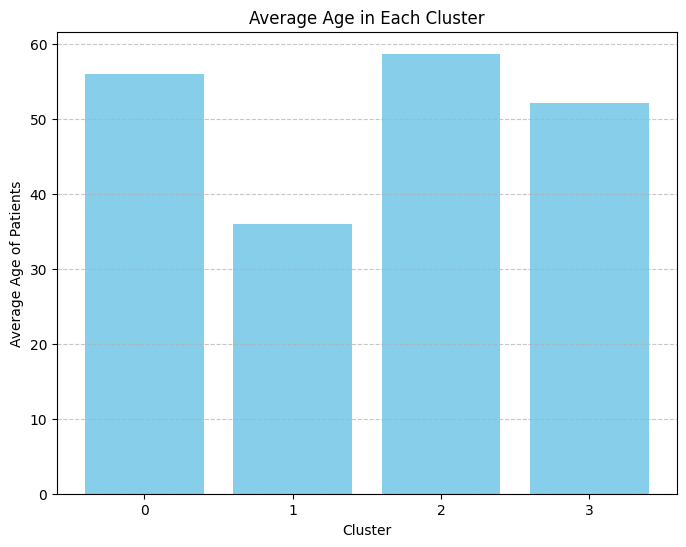

In [27]:
# Group the DataFrame by 'Cluster' and count the number of patients in each cluster
cluster_counts = df.groupby('Cluster')['Age'].mean().reset_index()
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts['Cluster'], cluster_counts['Age'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Age of Patients')
plt.title('Average Age in Each Cluster')
plt.xticks(cluster_counts['Cluster'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the bar chart
plt.show()

To gain insights into the characteristics of each cluster, we explored the average age of patients within each cluster. This allowed us to observe age-related patterns and differences among the identified clusters, providing valuable information for further analysis and decision-making."

**What insights can be derived from segmenting the patients based on their medical history?**

In [28]:
def plot_stacked_bars(df, variables):

  # Create a 2x3 grid of stacked bar charts
  fig, axes = plt.subplots(2, 3, figsize=(16, 12))
  for i, var in enumerate(variables):
      row, col = i // 3, i % 3  # Adjusted for 2 rows and 3 columns
      pivot = df.pivot_table(index='Medical History', columns=var, aggfunc='size', fill_value=0)
      pivot.plot(kind='bar', stacked=True, ax=axes[row, col])
      axes[row, col].set_title(f'{var} vs. Medical History')
      axes[row, col].set_xlabel('Medical History')
      axes[row, col].set_ylabel('Count')

  plt.tight_layout()
  return plt.show()

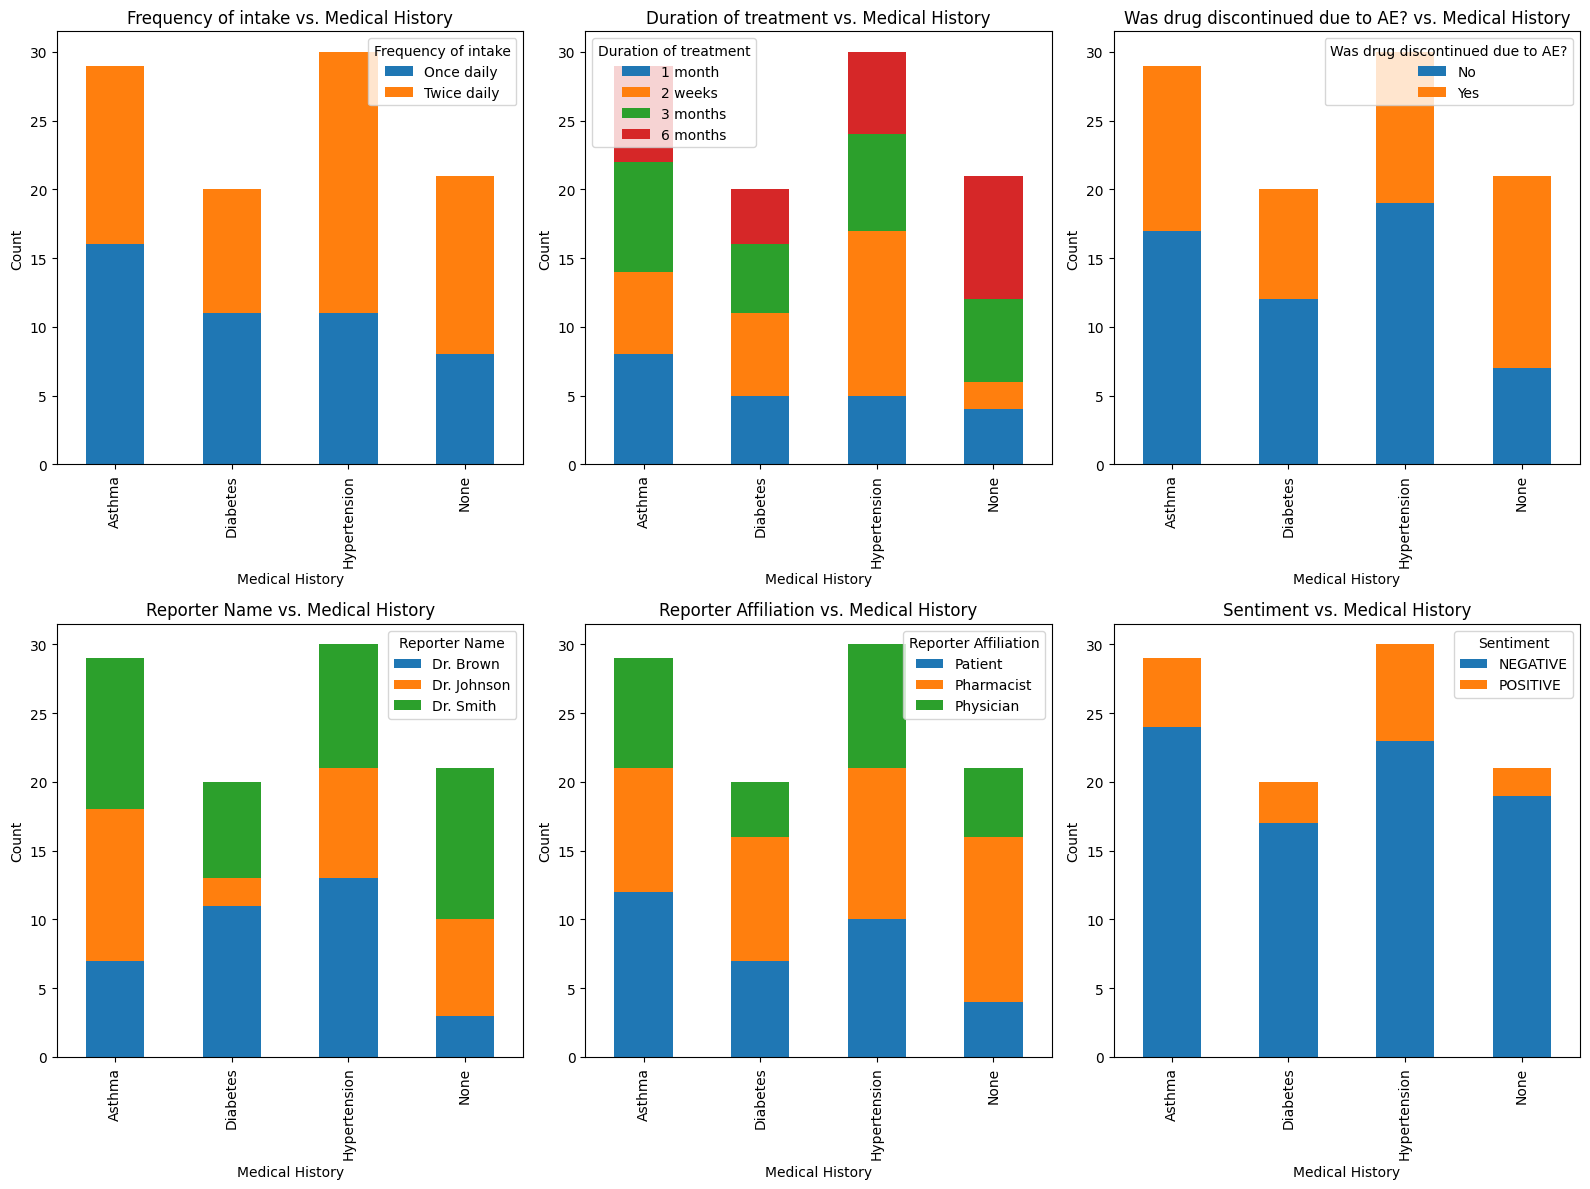

In [29]:
# Define the list of variables to plot against 'Medical History'
variables = ['Frequency of intake', 'Duration of treatment', 'Was drug discontinued due to AE?', 'Reporter Name',
       'Reporter Affiliation', 'Sentiment']
plot_stacked_bars(df, variables)

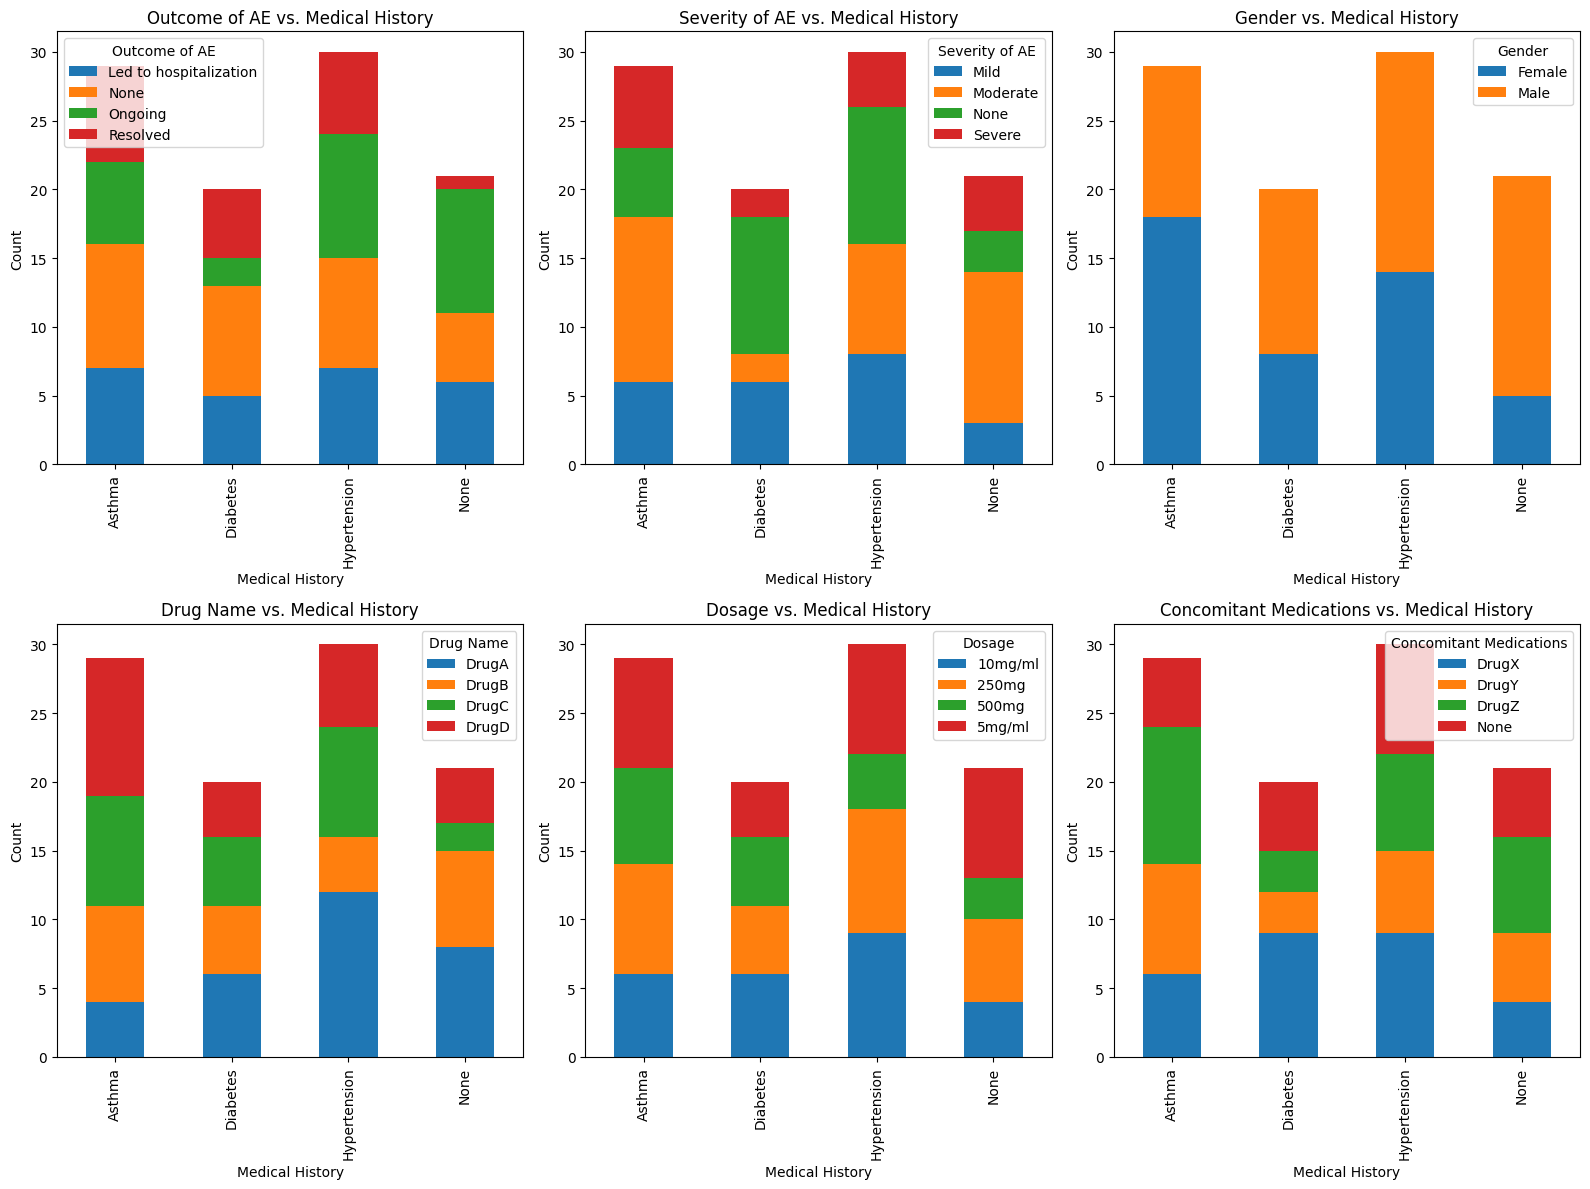

In [30]:
# Define the list of variables to plot against 'Medical History'
variables = [
      'Outcome of AE', 'Severity of AE', 'Gender',
      'Drug Name', 'Dosage','Concomitant Medications']
plot_stacked_bars(df, variables)

Segmenting patients by medical history yields crucial insights. It discerns treatment effectiveness, pinpoints risk factors, and guides personalized medicine. It aids preventive care, optimizes resource allocation, and tailors patient education. A few insights that can be gathered, the leading cases among patients is Hypertension, followed by Asthama and finally Diabetes. It appears, that Hpertension requires frequent dosage and takes short period of treatment. Asthma on the other hand, requires longer period of medication.

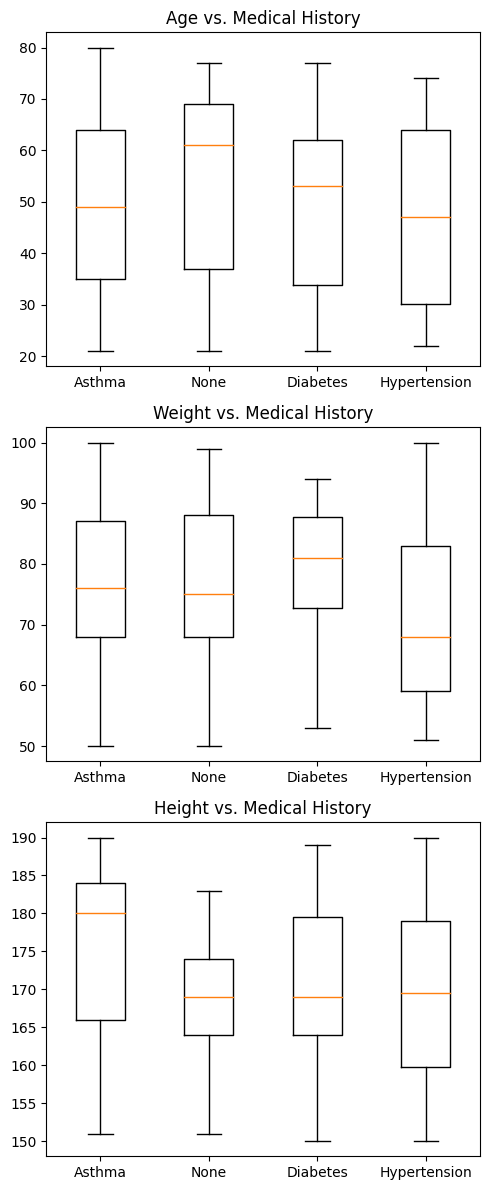

In [31]:
# Define the list of variables to plot
variables = ['Age', 'Weight', 'Height']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 12))  # Adjust figsize for vertical plots

# Loop through variables and create vertical boxplots with medical history on x-axis
for i, variable in enumerate(variables):
    data_to_plot = [df[df['Medical History'] == history][variable] for history in df['Medical History'].unique()]
    axes[i].boxplot(data_to_plot, vert=True)  # Set vert=True for vertical boxplots
    axes[i].set_title(f'{variable} vs. Medical History')
    axes[i].set_xticklabels(df['Medical History'].unique())  # Show medical history categories on x-axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Deep Learning

## Bar Charts / Pie Charts:

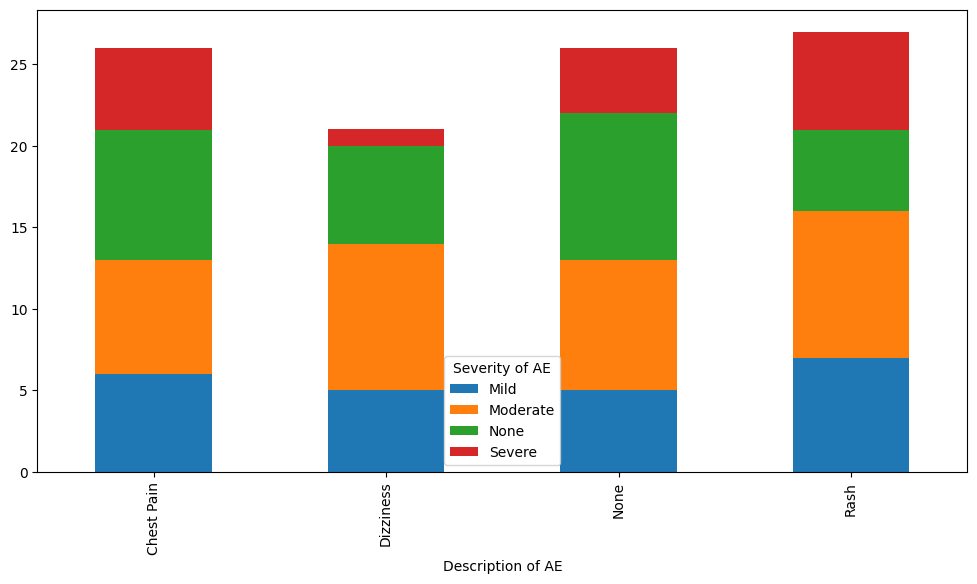

In [32]:
# Distribution of adverse events based on their severity
pivot = df.pivot_table(index='Description of AE', columns='Severity of AE', aggfunc='size', fill_value=0)
ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.show()

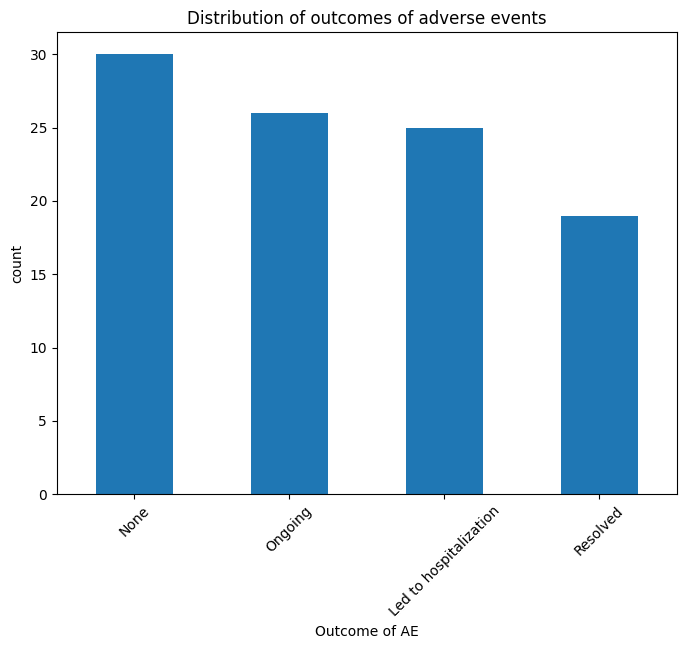

In [33]:
# Distribution of outcomes of adverse events (e.g., resolved, led to hospitalization, ongoing).
AE_count = df['Outcome of AE'].value_counts()
ax = AE_count.plot.bar(figsize=(8, 6))
plt.xlabel('Outcome of AE')
plt.title('Distribution of outcomes of adverse events')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

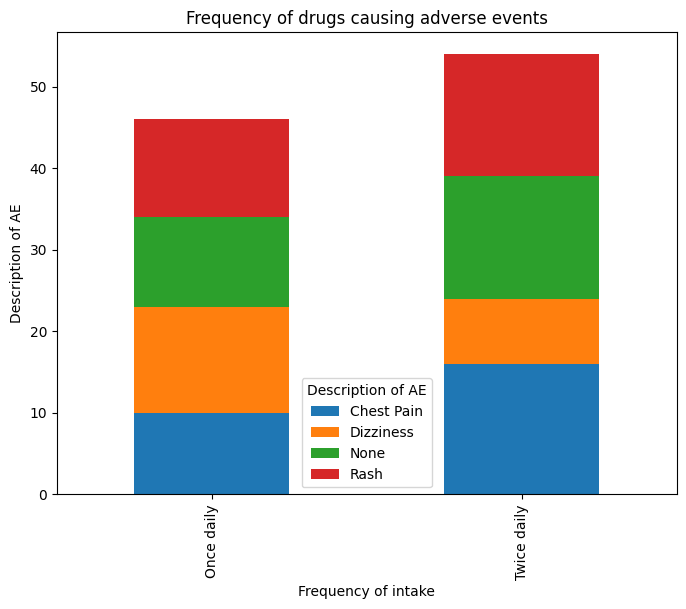

In [34]:
#Frequency of drugs/medications causing adverse events.
pivot = df.pivot_table(index = 'Frequency of intake', columns = 'Description of AE', aggfunc='size', fill_value=0)
ax = pivot.plot(kind = 'bar', stacked= True, figsize = (8,6))
plt.title('Frequency of drugs causing adverse events')
plt.ylabel('Description of AE')
plt.show()


## Word Clouds:

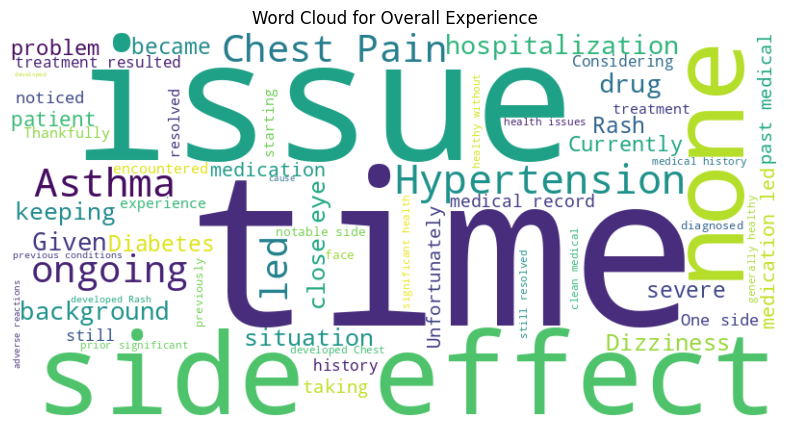

In [35]:
# Combine all text from the 'Overall Experience' column into a single string
text_data = ' '.join(df['Overall Experience'])

# Create a WordCloud object with desired settings (you can customize these)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Overall Experience')
plt.show()

##Box Plots

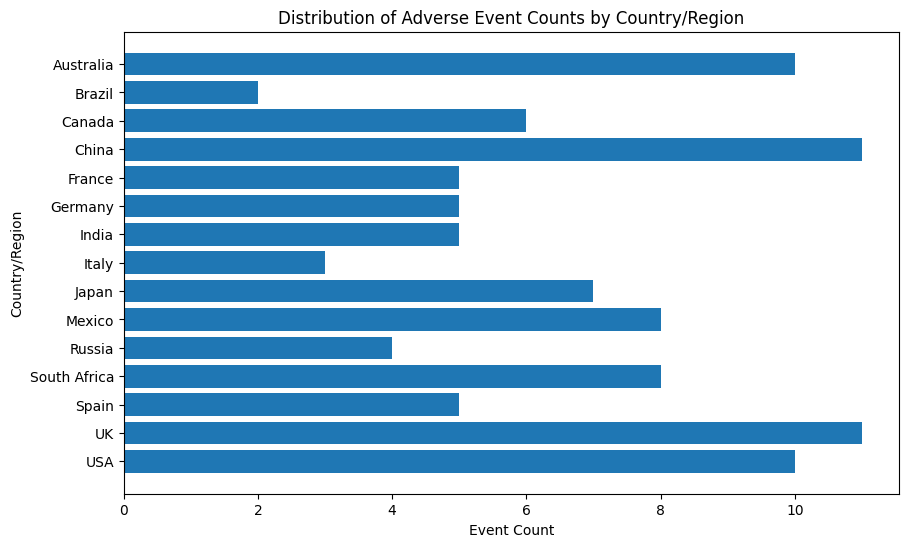

In [36]:
#Distribution of the number of adverse events by country or region (to identify outliers or regions with unusually high reports).
# Create a bar plot
event_counts = df.groupby('Country')['Description of AE'].count().reset_index()
event_counts.columns = ['Country', 'Event Count']
plt.figure(figsize=(10, 6))
plt.barh(event_counts['Country'], event_counts['Event Count'])
plt.title('Distribution of Adverse Event Counts by Country/Region')
plt.xlabel('Event Count')
plt.ylabel('Country/Region')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top
plt.show()

## Sentiment Distribution:

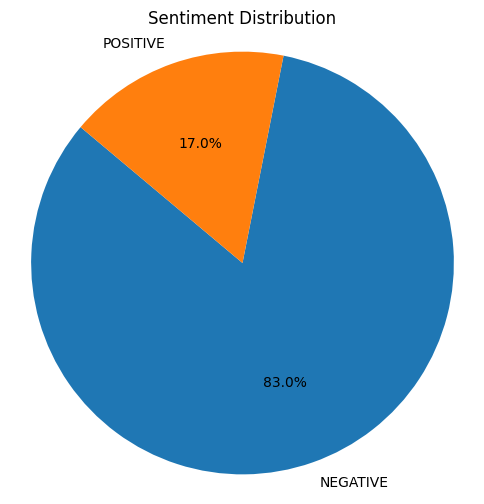

In [37]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Show the pie chart
plt.show()

## Geospatial Visualizations

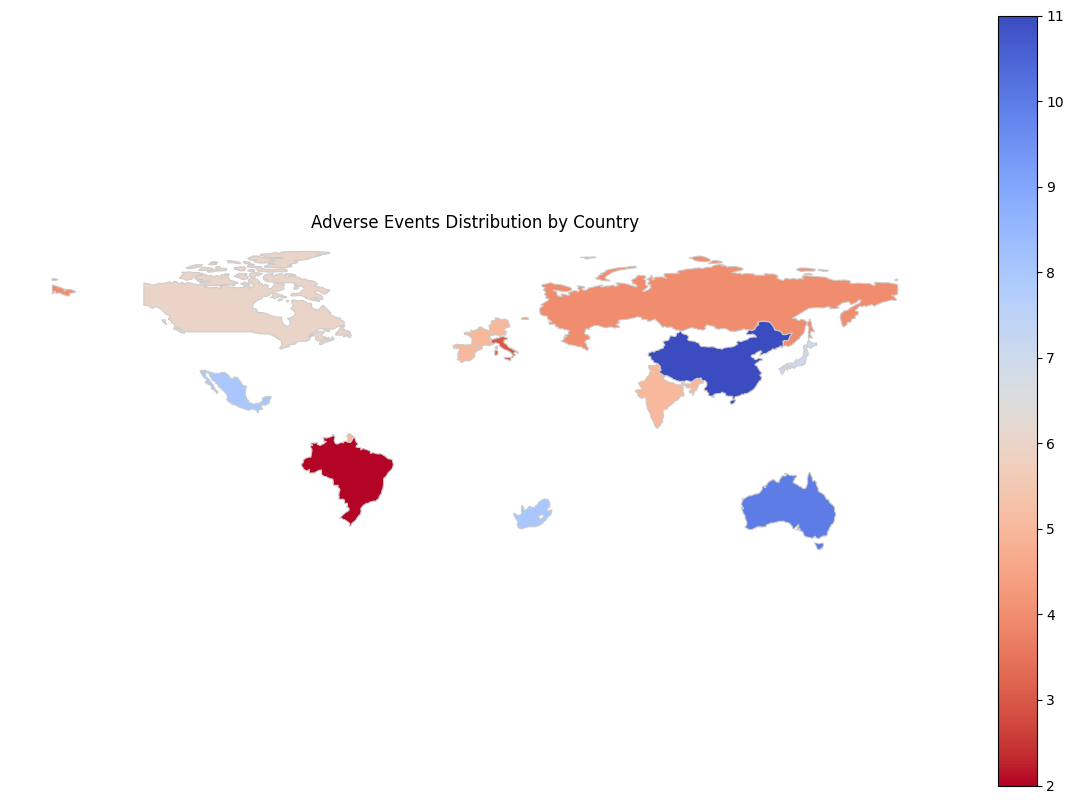

In [38]:
#Map showing the distribution of adverse events by country or region.
import geopandas as gpd

# Group by 'Country' and count adverse events
adverse_event_counts = df['Country'].value_counts().reset_index()
adverse_event_counts.columns = ['Country', 'Event Count']

# Sample geospatial data (replace with your shapefile data)
# Here, we use a built-in dataset for demonstration purposes
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge adverse event data with geospatial data
merged_data = world.merge(adverse_event_counts, left_on='name', right_on='Country', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Event Count', cmap='coolwarm_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the map appearance
ax.set_title('Adverse Events Distribution by Country')
ax.axis('off')  # Turn off axis

# Show the map
plt.show()



## Deep learning

Fine-tuning a model with BERT is a process of tailoring a pre-trained BERT model to excel in specialized natural language processing tasks. This involves a few key steps: First, we start with a pre-trained BERT model, which has already learned a vast amount of linguistic knowledge from massive text corpora. Next, we add task-specific layers on top of BERT, typically including an output layer. During training, we fine-tune the entire model using task-specific data. BERT's contextual understanding and representation of language allow it to capture intricate linguistic nuances in the fine-tuning process. By adjusting the model's weights, it becomes adept at recognizing patterns and features specific to the target task, such as sentiment analysis, question-answering, or text classification. This approach often leads to remarkable improvements in performance while requiring fewer training examples compared to training models from scratch.

In [39]:
from sklearn.preprocessing import OneHotEncoder
text = df['Overall Experience']
labels =  df['Sentiment']
label_map = {'POSITIVE': 1, 'NEGATIVE': 0}

labels = labels.map(label_map)
dff.head()
labels



0     0
1     0
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Sentiment, Length: 100, dtype: int64

In [40]:
from transformers import BertTokenizer,BertForSequenceClassification,AdamW
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [ ]:
# !pip install torch torchvision

In [41]:
import torch
input_ids = []
attention_mask = []

# Loop through each text document in the 'text' list
for i in text:
    # Encode the text using the tokenizer
    encoded_data = tokenizer.encode_plus(
        i,
        add_special_tokens=True,
        max_length=64,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Append the input_ids and attention_mask to their respective lists
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])

# Concatenate the lists of input_ids and attention_mask to create tensors
input_ids = torch.cat(input_ids, dim=0)
attention_mask = torch.cat(attention_mask, dim=0)

# Convert the 'labels' list into a tensor
labels = torch.tensor(labels)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [42]:
from torch.utils.data import DataLoader,SequentialSampler,RandomSampler,TensorDataset,random_split

In [43]:
# Create a TensorDataset using input_ids, attention_mask, and labels
dataset = TensorDataset(input_ids, attention_mask, labels)

# Define the size of the training set as 80% of the total dataset size
train_size = int(0.8 * len(dataset))

# Define the size of the validation set as the remaining 20%
val_size = len(dataset) - train_size

# Use random_split to split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Print the sizes of the training and validation sets
print('Training Size -', train_size)
print('Validation Size -', val_size)


Training Size - 80
Validation Size - 20


In [44]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create a data loader for the training dataset
train_dl = DataLoader(
    train_dataset,  # Your training dataset
    sampler=RandomSampler(train_dataset),  # Randomly sample data during training
    batch_size=32  # Batch size for training
)

# Create a data loader for the validation dataset
val_dl = DataLoader(
    val_dataset,  # Your validation dataset
    sampler=SequentialSampler(val_dataset),  # Sequentially sample data for validation
    batch_size=32  # Batch size for validation
)


In [45]:

# Initialize a BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',  # Specify the pre-trained BERT model
    num_labels=2,  # Number of classification labels (adjust as needed)
    output_attentions=False,  # Whether to output attention weights (set to False)
    output_hidden_states=False  # Whether to output hidden states (set to False)
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [47]:

# Check if a CUDA-enabled GPU is available, and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the selected device (GPU or CPU)
model.to(device)

# Print the selected device (GPU or CPU)
print(device)


cuda


In [48]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Initialize the optimizer (AdamW) with a specified learning rate and epsilon
optimizer = AdamW(model.parameters(),lr = 2e-5,eps=1e-8)
# Define the number of training epochs
epochs = 1

# Calculate the total number of training steps based on the number of batches per epoch
total_steps = len(train_dl) * epochs

# Create a linear learning rate scheduler with warmup
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,  # No warmup phase
    num_training_steps=total_steps
)


In [49]:
import numpy as np

def accuracy(preds, labels):
    """
    Calculate the accuracy of predicted labels compared to true labels.

    Parameters:
    - preds (numpy array): A 2D numpy array containing predicted labels.
      Each row represents a prediction, and each column represents the predicted class scores or probabilities.
    - labels (numpy array): A 1D or 2D numpy array containing true labels.
      If labels is 1D, it represents the ground truth labels for each prediction in preds.
      If labels is 2D, it should have the same shape as preds, and each row corresponds to true labels for the corresponding prediction.

    Returns:
    - accuracy (float): The accuracy of the model's predictions as a decimal value between 0 and 1.
      It represents the proportion of correct predictions among all predictions.

    Example Usage:
    ```python
    import numpy as np

    # Example predictions and true labels
    preds = np.array([[0.8, 0.2], [0.6, 0.4], [0.3, 0.7]])
    labels = np.array([0, 1, 1])

    # Calculate accuracy
    acc = accuracy(preds, labels)

    print(f'Accuracy: {acc:.2f}')
    ```

    Output:
    ```
    Accuracy: 0.67
    ```

    In the example, the function calculates the accuracy of preds compared to labels, resulting in an accuracy of 0.67 (67%).
    This means that 67% of the predictions match the true labels.
    """
    pred_flat = np.argmax(preds, axis=1).flatten()
    label_flat = labels.flatten()
    return np.sum(pred_flat == label_flat) / len(label_flat)


In [50]:

def evaluate(dataloader_test):
    """
    Evaluate the BERT model's performance on a test dataset.

    Parameters:
    - dataloader_test (DataLoader): DataLoader containing test data batches.

    Returns:
    - loss_val_avg (float): The average loss over the test dataset.
    - predictions (numpy array): Predicted logits or probabilities for each sample in the test dataset.
    - true_vals (numpy array): True labels for each sample in the test dataset.

    Example Usage:
    ```python
    # Example evaluation on a test dataloader
    test_loss, test_predictions, test_true_labels = evaluate(test_dataloader)

    # Calculate accuracy or other evaluation metrics
    test_accuracy = accuracy_score(test_true_labels, np.argmax(test_predictions, axis=1))
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
    ```

    In this example, the function evaluates the model's performance on a test dataset,
    returning the average loss, predicted logits, and true labels.
    """
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total / len(dataloader_test)
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals


In [51]:
from tqdm.notebook import tqdm
import torch

# Clear GPU cache
torch.cuda.empty_cache()

# Iterate through training epochs
for epoch in tqdm(range(1, epochs + 1)):

    # Set the model in training mode
    model.train()

    # Initialize total training loss
    loss_train_total = 0

    # Create a progress bar for the training epoch
    progress_bar = tqdm(train_dl, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

    # Iterate through training batches
    for batch in progress_bar:

        # Zero the gradients
        model.zero_grad()

        # Move the batch to the specified device (CPU or GPU)
        batch = tuple(b.to(device) for b in batch)

        # Prepare inputs for the model
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2],
        }

        # Forward pass through the model
        outputs = model(**inputs)

        # Calculate the loss
        loss = outputs[0]

        # Update the total training loss
        loss_train_total += loss.item()

        # Backpropagation
        loss.backward()

        # Clip gradients to avoid exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update model parameters using the optimizer
        optimizer.step()

        # Update the learning rate scheduler
        scheduler.step()

        # Update the progress bar with the current training loss
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})

    # Print training progress for the epoch
    tqdm.write(f'\nEpoch {epoch}')

    # Calculate and print the average training loss for the epoch
    loss_train_avg = loss_train_total / len(train_dl)
    tqdm.write(f'Training loss: {loss_train_avg}')

    # Evaluate the model on the validation dataset
    val_loss, predictions, true_vals = evaluate(val_dl)

    # Calculate and print the validation loss and accuracy
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Accuracy: {val_acc}')


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6649126907189687
Validation loss: 0.519641101360321
Accuracy: 0.75


In [52]:
# Define the output directory where the model and tokenizer will be saved
output_dir = './'

# Determine whether the model has a 'module' attribute (for handling distributed training)
model_to_save = model.module if hasattr(model, 'module') else model

# Save the trained model to the specified output directory
model_to_save.save_pretrained(output_dir)

# Save the tokenizer to the same output directory
tokenizer.save_pretrained(output_dir)


('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [53]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')

# Define the directory where the tokenizer and model are saved
output_dir = './'

# Load the BERT tokenizer from the specified directory
tokenizer = BertTokenizer.from_pretrained(output_dir)

# Load the pre-trained BERT model from the same specified directory
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading BERT tokenizer...


In [54]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

def Sentiment(sent):
    """
    Perform sentiment analysis on a given text using a pre-trained BERT model.

    Parameters:
    - sent (str): The input text for sentiment analysis.

    Returns:
    - index (int): The predicted sentiment class index.
      0 typically represents a negative sentiment, and 1 represents a positive sentiment.

    Example Usage:
    ```python
    text = "I really enjoyed the movie. It was fantastic!"
    sentiment_index = Sentiment(text)
    if sentiment_index == 0:
        print("Negative sentiment")
    elif sentiment_index == 1:
        print("Positive sentiment")
    ```

    In this example, the function performs sentiment analysis on the input text and returns the predicted sentiment index.
    Users can interpret the sentiment index, e.g., 0 for negative and 1 for positive sentiment.
    """
    output_dir = './'

    # Load the BERT tokenizer and pre-trained model from the specified directory
    tokenizer = BertTokenizer.from_pretrained(output_dir)
    model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

    # Tokenize and prepare the input text for the model
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=64,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']

    # Move data to the appropriate device (CPU or GPU)
    input_id = torch.LongTensor(input_id)
    attention_mask = torch.LongTensor(attention_mask)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded = model_loaded.to(device)
    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)

    # Perform inference to get sentiment logits
    with torch.no_grad():
        outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]

    # Determine the sentiment class index based on the highest logit score
    index = logits.argmax()

    return index


In [55]:
ans = Sentiment('that  medicine was great, nice!Nice!')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [67]:
# if ans == 1:
#     print("Positive")
# else:
#     print("Negative")